# Unzipping Dataset file facebook.zip

In [1]:
from zipfile import ZipFile
fileName = "facebook.zip"
with ZipFile(fileName, 'r') as myZip:
	myZip.printdir()
	myZip.extractall()
	print('Extraction completed')

File Name                                             Modified             Size
facebook/facebook_combined/                    2022-04-27 19:04:18            0
facebook/facebook_combined/facebook_combined.txt 2013-07-16 09:35:30       854362
facebook/facebook_main/                        2022-04-27 19:04:18            0
facebook/facebook_main/0.circles               2012-12-03 08:45:00         1400
facebook/facebook_main/0.edges                 2012-12-03 08:45:00        37228
facebook/facebook_main/0.egofeat               2012-12-03 08:45:00          448
facebook/facebook_main/0.feat                  2012-12-03 08:45:00       156736
facebook/facebook_main/0.featnames             2012-12-03 08:45:00         9303
facebook/facebook_main/107.circles             2012-12-03 08:45:00         2510
facebook/facebook_main/107.edges               2012-12-03 08:45:00       523802
facebook/facebook_main/107.egofeat             2012-12-03 08:45:00         1152
facebook/facebook_main/107.feat       

# Building Complete Dataset Graph

In [2]:
import networkx as nx
from operator import itemgetter
G = nx.Graph()

In [3]:
def buildGraph(G):
    fileName="/content/facebook/facebook_combined/facebook_combined.txt"
    f=open(fileName)
    line=f.readline()
    while(line!=''):
      c=(line.split())
      G.add_edge(int(c[0]), int(c[1]))
      line=f.readline()
    f.close()

In [4]:
buildGraph(G)

In [5]:
print("Number of edges: ", G.number_of_edges())
print("Number of nodes: ", G.number_of_nodes())

Number of edges:  88234
Number of nodes:  4039


**Sample Plotting of the network**

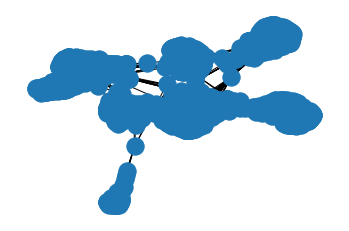

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
nx.draw(G)

# Clustering Coefficient Distribution in Dataset

In [7]:
import pandas as pd
import plotly.express as px

In [8]:
clusteringCoeff = nx.clustering(G)
df = pd.DataFrame(clusteringCoeff.values())
histogram = px.histogram(df, x = 0)
histogram.show()

# Function to Plot Visualizations

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [17]:
def plot_viz(G, pos, centrality_scores, centrality_name):
  node_list = centrality_scores.keys()
  node_color = list(centrality_scores.values())
  node_size = 250
  plotted_nodes = nx.draw_networkx_nodes(G, pos, node_size = node_size, cmap = plt.cm.plasma, node_color = node_color, nodelist = node_list)
  plotted_nodes.set_norm(mcolors.SymLogNorm(linthresh = 0.01, linscale = 1, base = 10))
  plotted_edges = nx.draw_networkx_edges(G, pos)
  plt.title(centrality_name)
  plt.colorbar(plotted_nodes)
  plt.axis('off')
  plt.show()

In [13]:
pos = nx.spring_layout(G, seed=675)

# Eigenvector Centrality

In [14]:
def calculate_eigen(G):
    eigen = nx.eigenvector_centrality(G)
    temp = []
    for node in eigen.keys():
      temp.append([node, eigen[node]])
    scores = temp
    temp = sorted(temp, key=itemgetter(1), reverse=True)
    scores = sorted(scores, key=itemgetter(0))
    for i in range(5):
        print(i,'. node ',temp[i][0],' with score of ',temp[i][1])
    return eigen, temp, scores

In [15]:
eigen, eigen_list, eigen_score = calculate_eigen(G)

0 . node  1912  with score of  0.09540696149067629
1 . node  2266  with score of  0.08698327767886553
2 . node  2206  with score of  0.08605239270584343
3 . node  2233  with score of  0.08517340912756598
4 . node  2464  with score of  0.08427877475676092


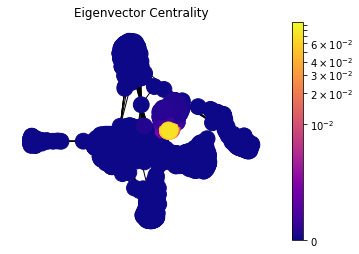

In [20]:
plot_viz(G, pos, eigen, 'Eigenvector Centrality')

# Closeness Centrality

In [21]:
def calculate_closeness(G):
    close = nx.closeness_centrality(G)
    temp = []
    for node in close.keys():
      temp.append([node, close[node]])
    scores = temp
    temp = sorted(temp, key=itemgetter(1), reverse=True)
    scores = sorted(scores, key=itemgetter(0))
    for i in range(5):
        print(i,'. node ',temp[i][0],' with score of ',temp[i][1])
    return close, temp, scores

In [22]:
close, close_list, close_score = calculate_closeness(G)

0 . node  107  with score of  0.45969945355191255
1 . node  58  with score of  0.3974018305284913
2 . node  428  with score of  0.3948371956585509
3 . node  563  with score of  0.3939127889961955
4 . node  1684  with score of  0.39360561458231796


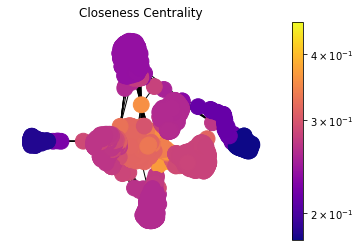

In [23]:
plot_viz(G, pos, close, 'Closeness Centrality')

# Betweeness Centrality

In [24]:
def calculate_between(G):
    between = nx.betweenness_centrality(G)
    temp = []
    for node in between.keys():
      temp.append([node, between[node]])
    scores = temp
    temp = sorted(temp, key=itemgetter(1), reverse=True)
    scores = sorted(scores, key=itemgetter(0))
    for i in range(5):
        print(i,'. node ',temp[i][0],' with score of ',temp[i][1])
    return between, temp, scores

In [25]:
between, between_list, between_score = calculate_between(G)

0 . node  107  with score of  0.4805180785560152
1 . node  1684  with score of  0.3377974497301992
2 . node  3437  with score of  0.23611535735892905
3 . node  1912  with score of  0.2292953395868782
4 . node  1085  with score of  0.14901509211665306


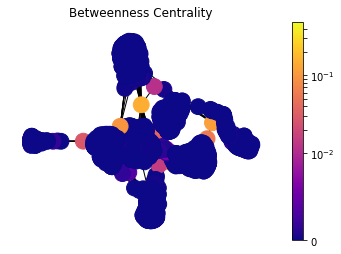

In [26]:
plot_viz(G, pos, between, 'Betweenness Centrality')

# Degree Centrality

In [28]:
def calculate_degree_centrality(G):
    degree = nx.degree_centrality(G)
    temp = []
    for node in degree.keys():
      temp.append([node, degree[node]])
    scores = temp
    temp = sorted(temp, key=itemgetter(1), reverse=True)
    scores = sorted(scores, key=itemgetter(0))
    for i in range(5):
        print(i,'. node ',temp[i][0],' with score of ',temp[i][1])
    return degree, temp, scores

In [29]:
degree, degree_list, degree_score = calculate_degree_centrality(G)

0 . node  107  with score of  0.258791480931154
1 . node  1684  with score of  0.1961367013372957
2 . node  1912  with score of  0.18697374938088163
3 . node  3437  with score of  0.13546310054482416
4 . node  0  with score of  0.08593363051015354


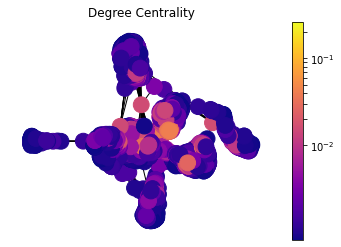

In [30]:
plot_viz(G, pos, degree, 'Degree Centrality')

# Rank Aggregation - Markov Chains

Reference: https://pypi.org/project/mc4/

In [48]:
f = open("/content/ranks.csv", "w")

In [43]:
node_labels = [node for node, score in eigen_score]
eigen_scores_f = [score for node, score in eigen_score]
close_scores_f = [score for node, score in close_score]
between_scores_f = [score for node, score in between_score]
degree_scores_f = [score for node, score in degree_score]

In [47]:
eigen_ranks_f = [sorted(eigen_scores_f, reverse=True).index(x) for x in eigen_scores_f]
close_ranks_f = [sorted(close_scores_f, reverse=True).index(x) for x in close_scores_f]
between_ranks_f = [sorted(between_scores_f, reverse=True).index(x) for x in between_scores_f]
degree_ranks_f = [sorted(degree_scores_f, reverse=True).index(x) for x in degree_scores_f]

In [49]:
import csv
writer = csv.writer(f)
writer.writerow(eigen_ranks_f)
writer.writerow(close_ranks_f)
writer.writerow(between_ranks_f)
writer.writerow(degree_ranks_f)
f.close()

In [22]:
!pip install mc4

In [50]:
from mc4.algorithm import mc4_aggregator
ranks_aggr = mc4_aggregator("/content/ranks.csv", order="column")
print(ranks_aggr)

{0: 4, 1: 2472, 2: 3198, 3: 2565, 4: 3141, 5: 2630, 6: 3431, 7: 1183, 8: 3194, 9: 1477, 10: 3196, 11: 3769, 12: 3769, 13: 2256, 14: 2872, 15: 3769, 16: 3164, 17: 2971, 18: 3768, 19: 2421, 20: 2848, 21: 643, 22: 2945, 23: 2320, 24: 2964, 25: 1250, 26: 1342, 27: 3434, 28: 2982, 29: 2769, 30: 2596, 31: 2208, 32: 3517, 33: 3727, 34: 997, 35: 3727, 36: 3202, 37: 3767, 38: 2999, 39: 2770, 40: 1724, 41: 2241, 42: 3726, 43: 3766, 44: 3512, 45: 3011, 46: 3555, 47: 3725, 48: 2222, 49: 3382, 50: 2987, 51: 3303, 52: 3725, 53: 1974, 54: 3146, 55: 2860, 56: 501, 57: 2654, 58: 167, 59: 2667, 60: 3257, 61: 3514, 62: 2248, 63: 3486, 64: 2092, 65: 2900, 66: 2970, 67: 525, 68: 3200, 69: 3115, 70: 3724, 71: 3652, 72: 2389, 73: 3023, 74: 3765, 75: 2952, 76: 3630, 77: 3251, 78: 3359, 79: 3153, 80: 1577, 81: 3500, 82: 2024, 83: 3302, 84: 2760, 85: 2879, 86: 3516, 87: 1423, 88: 2292, 89: 3168, 90: 3723, 91: 3193, 92: 2650, 93: 3266, 94: 2430, 95: 3398, 96: 3005, 97: 3538, 98: 1828, 99: 2880, 100: 3065, 101: 2

In [62]:
temp = []
for node in ranks_aggr.keys():
  temp.append([node, ranks_aggr[node]])
temp = sorted(temp, key=itemgetter(1))
print(temp)

[[107, 1], [1912, 2], [1684, 3], [0, 4], [348, 5], [2543, 6], [483, 7], [2347, 8], [2266, 9], [1941, 10], [1663, 11], [1352, 12], [2047, 13], [1126, 14], [2542, 15], [1577, 16], [1621, 17], [1086, 18], [1835, 19], [1376, 20], [1718, 21], [1584, 22], [2468, 23], [2007, 24], [2384, 25], [414, 26], [925, 27], [1800, 28], [2111, 29], [1431, 30], [2199, 31], [1730, 32], [1888, 33], [1361, 34], [1522, 35], [2081, 36], [1420, 37], [2289, 38], [1465, 39], [2133, 40], [428, 41], [1768, 42], [916, 43], [2283, 44], [2054, 45], [2328, 46], [136, 47], [376, 48], [1199, 49], [1509, 50], [1827, 51], [1985, 52], [2598, 53], [2333, 54], [563, 55], [1746, 56], [2117, 57], [1173, 58], [2233, 59], [1612, 60], [1377, 61], [2336, 62], [1589, 63], [475, 64], [2292, 65], [1617, 66], [2268, 67], [2032, 68], [2142, 69], [1622, 70], [1390, 71], [2282, 72], [2087, 73], [1804, 74], [2510, 75], [1926, 76], [2511, 77], [1945, 78], [2068, 79], [2189, 80], [921, 81], [1559, 82], [1833, 83], [1483, 84], [2187, 85], [10

# Top 4 Most Influential Nodes

In [66]:
pos = nx.spring_layout(G)

(-0.8806890138983727,
 1.1787080058455466,
 -0.9424063068628311,
 1.1175425153970717)

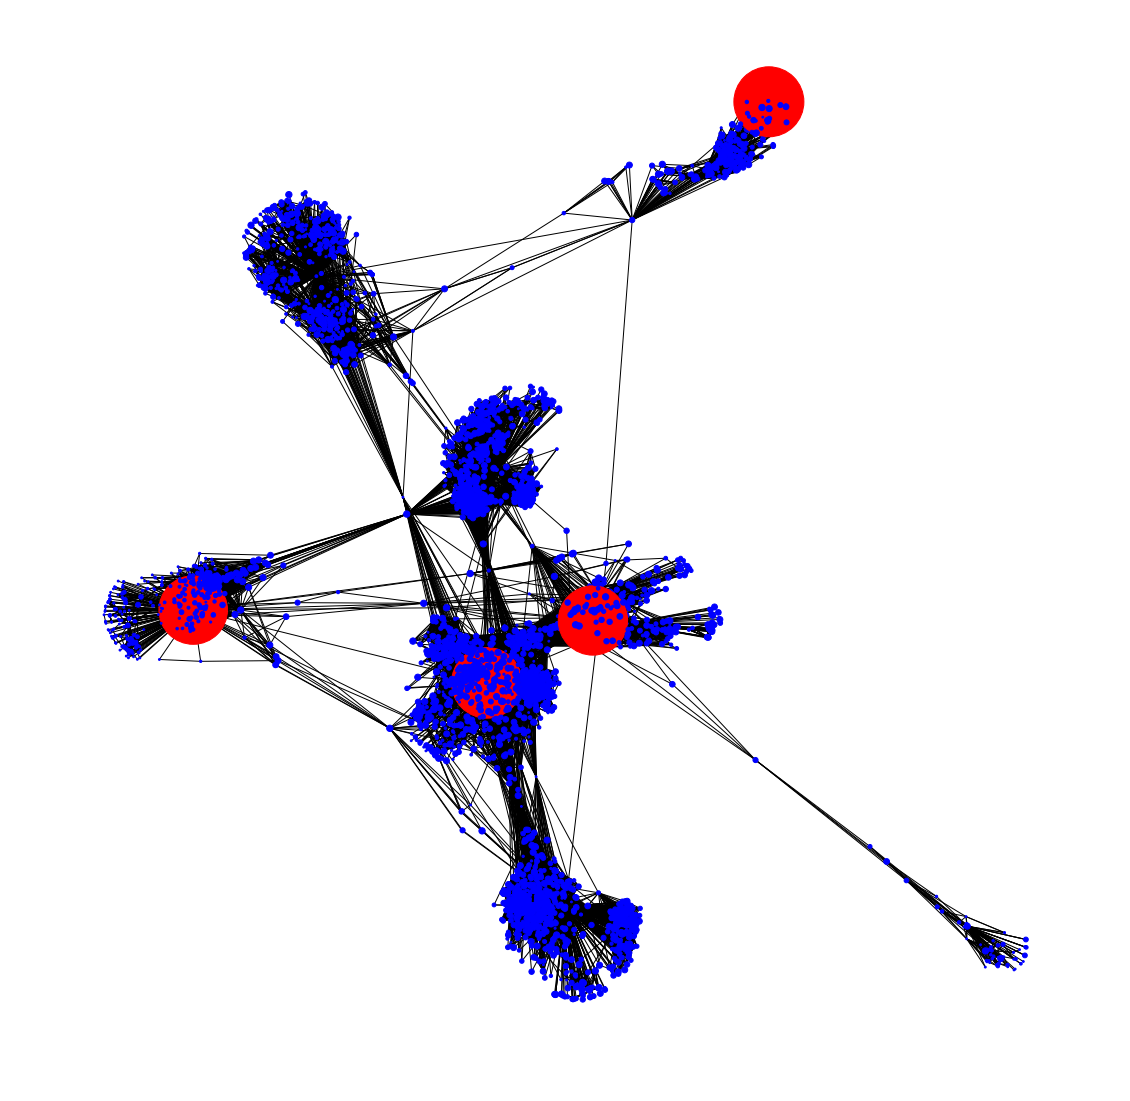

In [86]:
node_color = ["blue" for i in range(len(ranks_aggr.keys()))]
node_size = [((4039-rank)*0.01) for rank in between_ranks_f]
node_color[107] = "red"
node_color[1912] = "red"
node_color[1684] = "red"
node_color[0] = "red"
node_size[107] = 5000
node_size[1912] = 4900
node_size[1684] = 4800
node_size[0] = 4700
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
node_color=node_color, 
node_size=node_size)
plt.axis('off')

In [82]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

# Rank Distribution Viz.

Big blobs are the 4 most influential nodes in the network

(-0.8806890138983727,
 1.1787080058455466,
 -0.9424063068628311,
 1.1175425153970717)

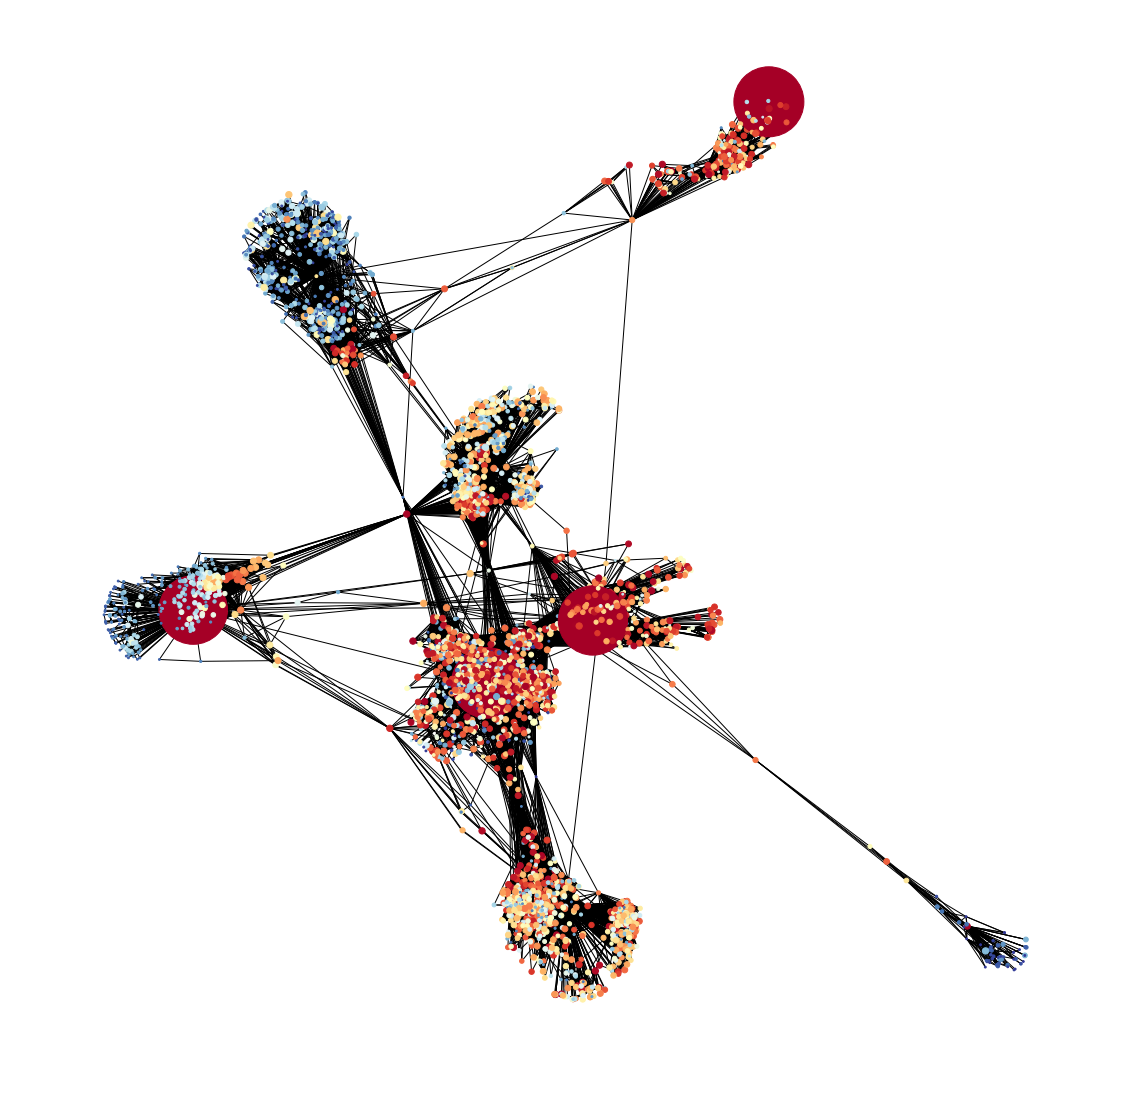

In [98]:
node_color = [ranks_aggr[node] for node in ranks_aggr.keys()]
node_size = [((4039-rank)*0.01) for rank in between_ranks_f]
# node_color[107] = "red"
# node_color[1912] = "red"
# node_color[1684] = "red"
# node_color[0] = "red"
node_size[107] = 5000
node_size[1912] = 4900
node_size[1684] = 4800
node_size[0] = 4700
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
node_color=node_color, 
node_size=node_size, cmap=plt.cm.RdYlBu)
plt.axis('off')

References:

https://pypi.org/project/mc4/


# Examining Communities in the Data

There are 13 communities in the graph

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)

In [115]:
print(len(communities))

13


# Community Viz.

(-0.8806890138983727,
 1.1787080058455466,
 -0.9424063068628311,
 1.1175425153970717)

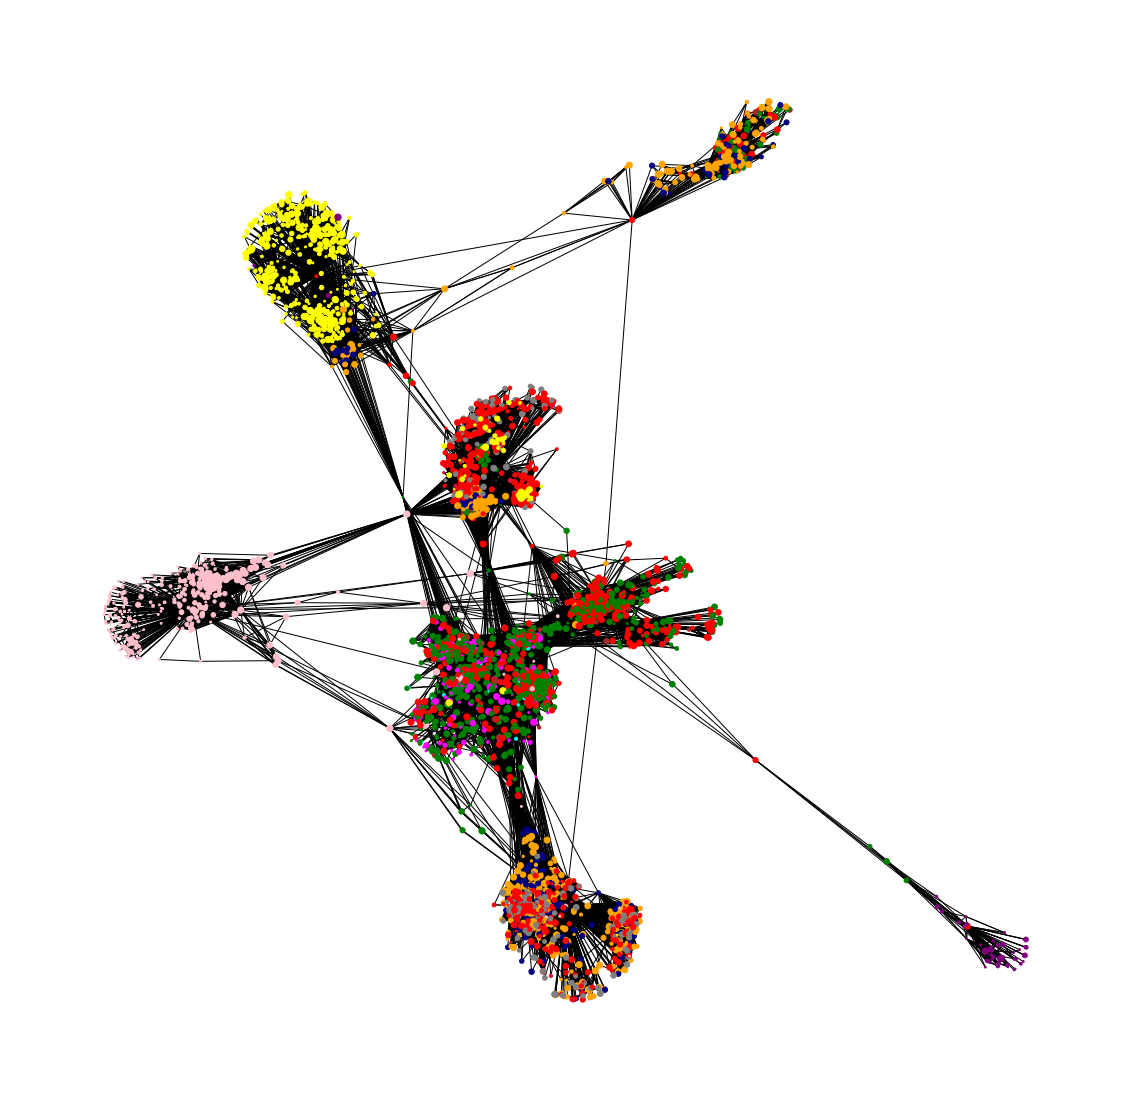

In [118]:
color = ["red", "green", "yellow", "orange", "pink", "grey", "navy", "magenta", "purple", "brown", "aqua", "crimson", "gold"]
node_color = [ranks_aggr[node] for node in ranks_aggr.keys()]
node_size = [((4039-rank)*0.01) for rank in between_ranks_f]
plt.figure(figsize=(20,20))
for i in range(len(communities)):
  community = list(communities[i])
  for node in community:
    node_color[node] = color[i]
nx.draw_networkx(G, pos=pos, with_labels=False,
node_color=node_color, 
node_size=node_size)
plt.axis('off')

# Community-wise influencers

(-0.8806890138983727,
 1.1787080058455466,
 -0.9424063068628311,
 1.1175425153970717)

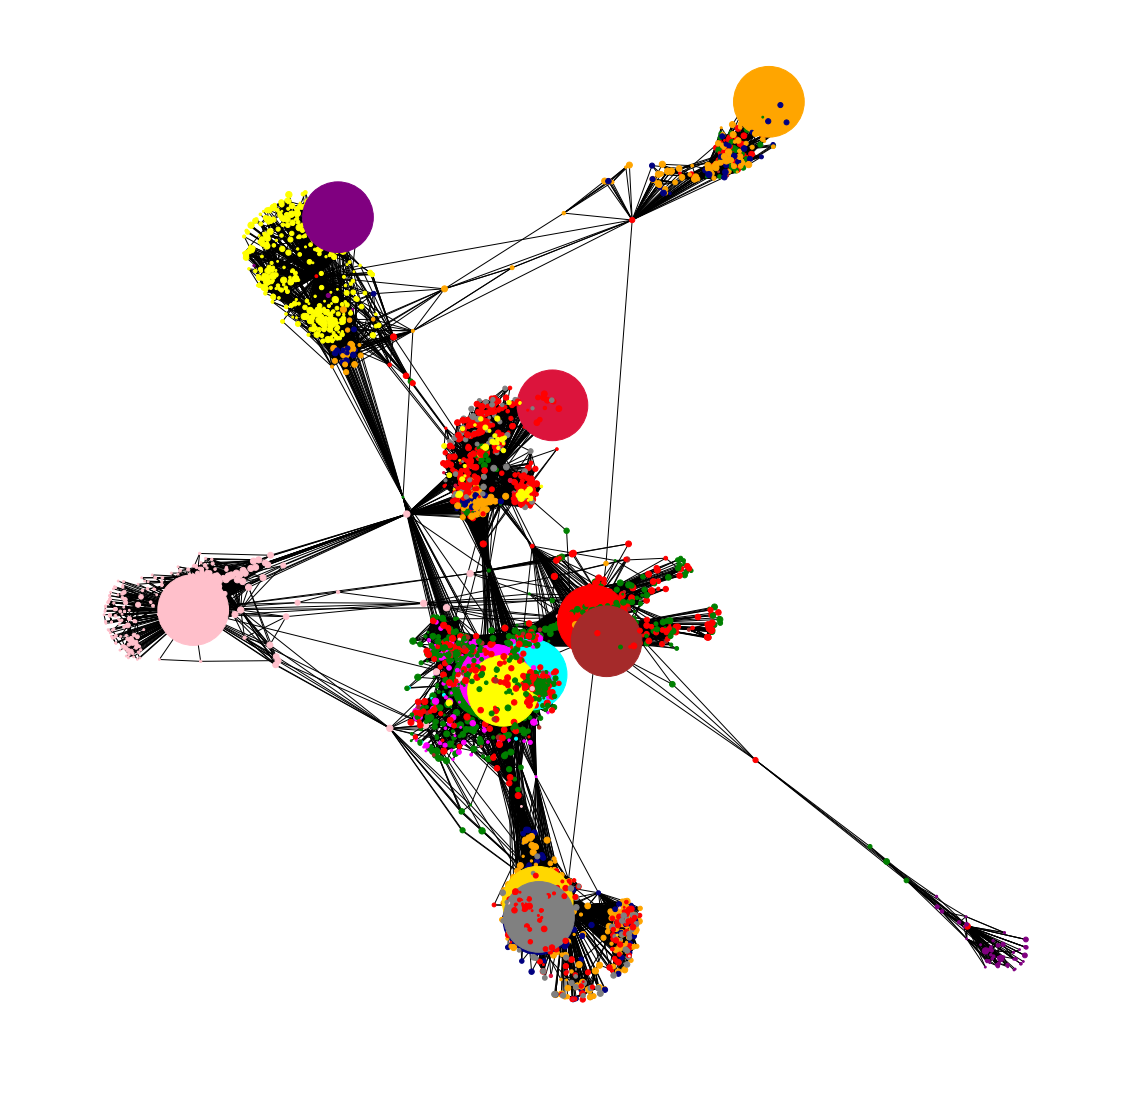

In [121]:
color = ["red", "green", "yellow", "orange", "pink", "grey", "navy", "magenta", "purple", "brown", "aqua", "crimson", "gold"]
node_color = [ranks_aggr[node] for node in ranks_aggr.keys()]
node_size = [((4039-rank)*0.01) for rank in between_ranks_f]
plt.figure(figsize=(20,20))
community_influencers = []
for i in range(len(communities)):
  community = list(communities[i])
  minRank = 100000
  minNode = None
  for node in community:
    node_color[node] = color[i]
    if (ranks_aggr[node] < minRank):
      minNode = node
      minRank = ranks_aggr[node]
  community_influencers.append(minNode)
for node in community_influencers:
  node_size[node] = 5000
nx.draw_networkx(G, pos=pos, with_labels=False,
node_color=node_color, 
node_size=node_size)
plt.axis('off')

In [122]:
maxRank = -1
for node in community_influencers:
  if (ranks_aggr[node] > maxRank):
    maxRank = ranks_aggr[node]
print("Maximum Rank amongst the influencers: ", maxRank)

Maximum Rank amongst the influencers:  3384
